In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO

In [39]:
import pprint

In [150]:
seqs = []
seqs_len = []
for seq_record in SeqIO.parse('sc_promoters.txt', "fasta"):
    #print(seq_record.id)
    seqs.append(str(seq_record.seq)[:-1])
    seqs_len.append(len(str(seq_record.seq)[:-1]))

In [151]:
seqs_df = pd.DataFrame(seqs, columns=['promoter'])

In [152]:
#seqs_len

In [153]:
seqs_df

,promoter
0,GCTCGGTTTTTGCTCTTTTTCTTCCGTTTTTATGTCATTGGGGTGG...
1,CAGAGAGTAGGTCCATTTGGTTTTCGTAAAATACACTACGTAAGAT...
2,TATTTTAGGTTTTGCGATTTAAAATATTCGGGGTCATTATTTGTTT...
3,ATGTCCATTATTTTTAATCTAAAAAAAGCATTTGATATTTTTTCCT...
4,CAGCTTTAGTGTACAGGGTTAATCTATAGCCACATTAAAAGGACTT...
...,...
5096,ATAAGTTTGGTTTCCCTTCCCGTTATTATGATCGCTCGTGACGGAT...
5097,CGAAATAACTCAGTAGAAGGGTGAAAATAGATGATAAGAATTTTAT...
5098,ACATGTGAGCCATAGTGCAGATACTCGTACTACTGTTGTAAATATT...
5099,AGCTTTTATGACCTAATCATTAGCACTATTCATTGCCAAATATGCA...


In [36]:
# get chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [181]:
#test = list(seqs[0])
#print(test)

In [180]:
#chunks(test,10)

In [179]:
#chunks_list = list(chunks(test, 10))

In [178]:
#pprint.pprint(list(chunks(test, 10)))

In [177]:
#chunks_list

In [176]:
#np.asarray(chunks_list)

In [87]:
import random
mut_index = sorted(random.sample(range(31), 10))
mut_index

[0, 3, 4, 6, 8, 9, 16, 18, 24, 29]

In [116]:
def mutate_v1(dna_list):
    mutation_site = random.randint(0, len(dna_list) - 1)
    dna_list[mutation_site] = random.choice(list('ATCG'))
    return dna_list

i2c = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}

def mutate_v2(dna, N):
    dna = np.asarray(dna)  # array of characters
    mutation_sites = np.random.randint(0, dna.shape[0] - 1, size=N)
    # Must draw bases as integers
    new_bases_i = np.random.randint(0, 3, size=N)
    # Translate integers to characters
    new_bases_c = np.zeros(N, dtype='c')
    for i in i2c:
        new_bases_c[new_bases_i == i] = i2c[i]
    dna[mutation_sites] = new_bases_c
    return dna.tolist()

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
#mutate_v2(['G', 'C', 'T', 'C', 'G', 'G', 'T', 'T', 'T', 'T'], 5)

['G', 'C', 'G', 'C', 'G', 'G', 'C', 'T', 'T', 'A']

In [154]:
original = seqs[0]

In [155]:
original

'GCTCGGTTTTTGCTCTTTTTCTTCCGTTTTTATGTCATTGGGGTGGCGGTAGTCATTCCGTTTTACGGTATGTTTATTCTGACACTTTGACGCAGATCTAAAAGGTGGAGTGTGGAGTACAAATAGCTCTCTCTCAAATACAGAAAAATACTTGAGTGTACAAAAGTAGCAACCTTTAAATAACAATGATTACTTCAATTGACATAGCAGATGTAACTTATTCTGCCAAACCAAGAATTTTGGTGCCTTATAAAACCCAATGGGAAGTCGCCAGTCATCTTCCTGAATATCGCAAACTGG'

In [186]:
def neg_ds(seq):
    res = ''
    c_list = np.asarray(list(chunks(list(seq), 10)))
    mut_index = sorted(random.sample(range(30), 20))
    #print (mut_index)
    m_list = []
    for i in mut_index:
        #print (i)
        #print('original', ''.join(c_list[i]))
        mutated = mutate_v2(c_list[i], 5)
        m_list.append(mutated)
        #print('mutated ', ''.join(mutated))
        #print (m_list)
    c_list[mut_index] = m_list
    return ''.join([''.join(item) for item in c_list.tolist()])

In [187]:
neg_ds(original)

'GCTCGGTTTTTGCTCTTTTTCTTCCGTTTTGAAGCCAATGGGGTGGCGGTAGCCACAGCGTTTTACGGTATGTGTCTGCTGACACGTTGAGGCCCATCTAACAGGGGCCGTATCGAGCACAAATAGCTCTCGCTCACGAACAGACACCCACTTGAGTGTACCGAAGCGACAACACATAAAACACAATGGTGCATTCAATTCACATAGACGGTGAACCGGATCCAGCGACACCCAGCATCTTGGGGCCTTATAAAACCCAAAGGCAGATCGACCGACATGTTCCTGAATATCGCAAACTGG'

In [175]:
negative_dataset = []

In [188]:
# for j in seqs:
#     negative_dataset.append(neg_ds(j))

In [189]:
len(negative_dataset)

5101

In [192]:
negative_df = pd.DataFrame(negative_dataset, columns=['non_promoter'])

In [193]:
negative_df

,non_promoter
0,GCCACGTTATTGCTCTTTTTCTACCGTTGTTAAGGCATTGCCATGG...
1,CAGAGAGTAGGTCCATTTGGATTGCGCAAAACACACTAAGTAAGAT...
2,TGTTTCGCCTTTTGCGATTTAGAAAATACGGGAGCGTCATTTCCTT...
3,GGGTGCACTACTGAGGATCTGGCAAAAGAAATGGACATTTTTTCCT...
4,CACCTTTAATGGAGAAGCTTCAACGATACCCACGTTGAGAGGACTA...
...,...
5096,ATAAGTTTGGAAGCCCCGCCCGGTATACTGACGGATCATGACGGAT...
5097,GGAAAAAACTCAGTAGAAGGCCGAAAATAGAGGAAAAGAATTGGAT...
5098,ACATGTGAGCCATAGTGCAGATACTCGTACTACTGTTGTAAATATT...
5099,AACCTATATGACCTAATCATTAGCACAATTCATTGCGCAATATGCA...


In [194]:
positive_df = seqs_df

In [195]:
positive_df

,promoter
0,GCTCGGTTTTTGCTCTTTTTCTTCCGTTTTTATGTCATTGGGGTGG...
1,CAGAGAGTAGGTCCATTTGGTTTTCGTAAAATACACTACGTAAGAT...
2,TATTTTAGGTTTTGCGATTTAAAATATTCGGGGTCATTATTTGTTT...
3,ATGTCCATTATTTTTAATCTAAAAAAAGCATTTGATATTTTTTCCT...
4,CAGCTTTAGTGTACAGGGTTAATCTATAGCCACATTAAAAGGACTT...
...,...
5096,ATAAGTTTGGTTTCCCTTCCCGTTATTATGATCGCTCGTGACGGAT...
5097,CGAAATAACTCAGTAGAAGGGTGAAAATAGATGATAAGAATTTTAT...
5098,ACATGTGAGCCATAGTGCAGATACTCGTACTACTGTTGTAAATATT...
5099,AGCTTTTATGACCTAATCATTAGCACTATTCATTGCCAAATATGCA...


In [197]:
#write to file
positive_df.to_csv('positive_df.csv')
negative_df.to_csv('negative_df.csv')

In [198]:
# creating labels

In [199]:
pos_label = np.ones((5101,1))

In [202]:
neg_label = np.zeros((5101,1))

In [216]:
label = np.concatenate((neg_label,pos_label))

In [217]:
label_df = pd.DataFrame(label, columns=['label'])

In [218]:
label_df.to_csv('label.csv')

In [219]:
#sequences

In [223]:
negative_df['non_promoter'][3399]

'GATGCAGAAGACGCCATCCACGTGCAGAACAACATAGTCTGGGGAAGAGGGGAGGGAGCATGTTCATTCTGCGAAGGAATAAGAGGATAGTGATAATGACCAAGCGTGAAGTCTCGAAATCCGCTAACAAGACAATATATTTACACACAATGCAGTTTGTAGTAGGGATCGGTACTCACTCTTGCATAAAAAAGAAAGTCACCAAGAAGTAGGGATGATAATGCGCCAACACACCGGCAAAACAGTACTTCACTAAATTTAAGCACAAAACAAGAGGAACAGAATTGCTATTAAAGGTAT'

In [222]:
seq2305 = 'AATTGCGGTATGCTCGGTACTACCATGATGATTAGACAATGGGCAGCGACGACGGAAAGTTGGTTGGACCGACAAATTTGATGACCGGCAAAAGATTGTTGATGTAGGTTAAAGTCTCCAATTGAAATTTACGCACAAAAAGTTAGACATGAAATATTGAAAACAATGCTATAACTGCTCAGAGGAAATTAGACATCAACAACGACCGAAACGAGCACGGTCAGAATCTAAGCTGGTTATATGTCGGGCAGCAAAGCTTACGGAAAAAAACCACGTAATCGACCAGTTGTGCCGTAGGGA'

In [224]:
seq3399 = 'GATGCAGAAGACGCCATCCACGTGCAGAACAACATAGTCTGGGGAAGAGGGGAGGGAGCATGTTCATTCTGCGAAGGAATAAGAGGATAGTGATAATGACCAAGCGTGAAGTCTCGAAATCCGCTAACAAGACAATATATTTACACACAATGCAGTTTGTAGTAGGGATCGGTACTCACTCTTGCATAAAAAAGAAAGTCACCAAGAAGTAGGGATGATAATGCGCCAACACACCGGCAAAACAGTACTTCACTAAATTTAAGCACAAAACAAGAGGAACAGAATTGCTATTAAAGGTAT'

In [232]:
m = 5101
locations = (5174-m,6697-m,6751-m,7974-m,8205-m)

In [233]:
locations

(73, 1596, 1650, 2873, 3104)

In [237]:
positive_df['promoter'][1650]

'AGAGCTCAAAGCAAAGGACACAGTACACCTGTGTGACGGTGAGTTTCCTATTGCCTTCTCTTTTTCCGTTTGTATTAATCTTTTCAAGAAAAAGTTCATTTCCAAAGTGGCCATTTTCGCGATGCACATCAATAATGATAAACACCTTTATTGAATAATAGCGAAGCAAATAGCAGATATTCCCAATAAAACAGCAAATTAATAAAAGGGCATAGACCAAGGAGTACATGCTAATGCTATACCACGAATTGAGGAATTAGAAAGAAAGTTAGCCAATGGACCAGCTAAGTGACAGCTATG'

In [239]:
seq73_5174 = 'TGAAAACTAGATAGGCAAGCAAGATTTTTCATTTGTAGAGCTCTTACGCAAGATTTTTAAACTTCCGCTTTTTTAATCCATGAGATTCCTTTGGACACCCTTTCCGGCACGGCAAAACAAAAAAATTAAGGGAACTCATTATTTTACGATGCTACTTAGATAACTAAAGTTCATTATATTTCAACAAATATAAGATAATCAAGAATAAAATGTCGTCAGAAAGGGTCTTAAGTTATGCACCAGCTTTTAAATCATTTCTGGATACATCTTTTTTCCAAGAATTATCGAGATTGAAACTCG'

In [236]:
seq1596_6697 = 'ATTAAACGTTATTTGCCCCTTCAAATATTCAATATTTCCCATCGCTAATAAAAAAGCTGCATTTTTATTTATTACTTTTTAAATATCATATTTGACGATCGTGTAGGACCCCTATGATTTAACATATCAAGAATGAATGAAAAGAACGTCAGAAACACAAGGTTAATTGCCTGTTATAATCAGACGATTGTAATATAACCATAGAGTTAGTGGGTATTGGAAAGGCCGGTAAAGATAACAGGGATCTCTGAAAAATGCCCAAGTTGGAACAATTTGAAATAAAAAAATACTGGCAAATCT'

In [238]:
seq1650_6751 = 'AGAGCTCAAAGCAAAGGACACAGTACACCTGTGTGACGGTGAGTTTCCTATTGCCTTCTCTTTTTCCGTTTGTATTAATCTTTTCAAGAAAAAGTTCATTTCCAAAGTGGCCATTTTCGCGATGCACATCAATAATGATAAACACCTTTATTGAATAATAGCGAAGCAAATAGCAGATATTCCCAATAAAACAGCAAATTAATAAAAGGGCATAGACCAAGGAGTACATGCTAATGCTATACCACGAATTGAGGAATTAGAAAGAAAGTTAGCCAATGGACCAGCTAAGTGACAGCTATG'

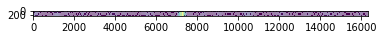

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


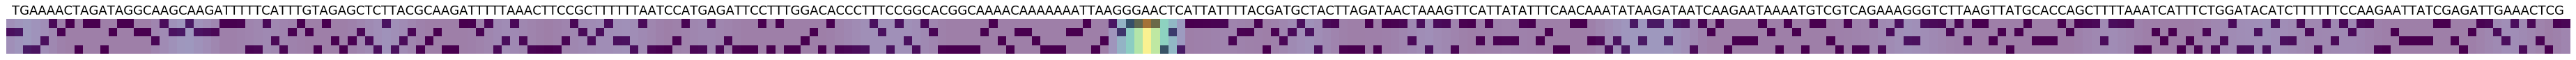

In [257]:
fig = plt.figure(figsize=(66,1))
img=mpimg.imread('5174.png')
imgplot = plt.imshow(img)
plt.title(seq73_5174, fontsize=18)
#plt.show()
plt.axis('off')
plt.savefig('5174_pro.png',bbox_inches = 'tight',pad_inches = 0)

<Figure size 432x288 with 0 Axes>

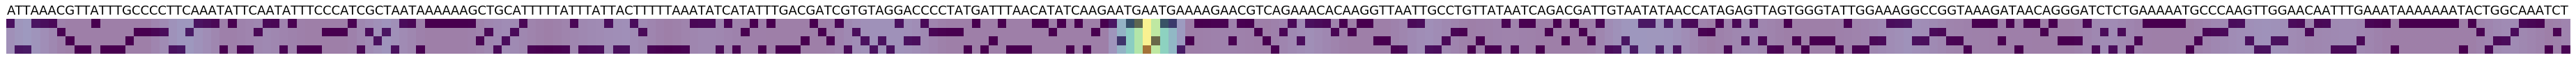

In [258]:
fig = plt.figure(figsize=(66,1))
img=mpimg.imread('6697.png')
imgplot = plt.imshow(img)
plt.title(seq1596_6697, fontsize=18)
#plt.show()
plt.axis('off')
plt.savefig('6697_pro.png',bbox_inches = 'tight',pad_inches = 0)

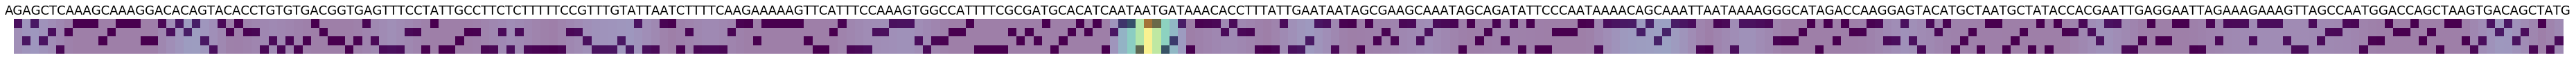

In [259]:
fig = plt.figure(figsize=(66,1))
img=mpimg.imread('6751.png')
imgplot = plt.imshow(img)
plt.title(seq1650_6751, fontsize=18)
#plt.show()
plt.axis('off')
plt.savefig('6751_pro.png',bbox_inches = 'tight',pad_inches = 0)